# Census Income Data Set 

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline

# Load the Data

In [2]:
col_names=['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'inc_class']


In [3]:
ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)
ds.head()

/var/folders/6r/1m4vqq2918dbj4br6r6qsn2c0000gn/T/ipykernel_27408/41874643.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  ds=pd.read_csv('adult.data', ',', names=col_names, index_col=False)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,inc_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ds.shape

(32561, 15)

In [5]:
ds['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

# Categorical features

In [6]:
import category_encoders as ce

In [7]:
ds.dtypes[ds.dtypes=='object'].index


Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'inc_class'],
      dtype='object')

In [8]:
ce_bin = ce.BinaryEncoder(cols = list(ds.dtypes[ds.dtypes=='object'].index))
ce_bin.fit_transform(ds)

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,capital-loss,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,inc_class_0,inc_class_1
0,39,0,0,0,1,77516,0,0,0,0,...,0,40,0,0,0,0,0,1,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,0,13,0,0,0,0,0,1,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
4,28,0,0,1,1,338409,0,0,0,0,...,0,40,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,1,1,257302,0,0,1,1,...,0,38,0,0,0,0,0,1,0,1
32557,40,0,0,1,1,154374,0,0,0,1,...,0,40,0,0,0,0,0,1,1,0
32558,58,0,0,1,1,151910,0,0,0,1,...,0,40,0,0,0,0,0,1,0,1
32559,22,0,0,1,1,201490,0,0,0,1,...,0,20,0,0,0,0,0,1,0,1


# Algorithms

In [9]:
from sklearn.model_selection import train_test_split

#set x and y
#classification
ds_clf=ds.drop(['inc_class'], axis=1)
#binary encoding
ce_bin = ce.BinaryEncoder(cols = list(ds_clf.dtypes[ds_clf.dtypes=='object'].index))
ds_clf_bin_enc=ce_bin.fit_transform(ds_clf)
y_clf=[0 if ic==' <=50K' else 1 for ic in ds.inc_class]
#Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(ds_clf_bin_enc, y_clf, test_size=0.33, random_state=42)


#regression
ds_reg = ds.drop(['age'], axis=1)
ce_bin = ce.BinaryEncoder(cols = list(ds_reg.dtypes[ds_reg.dtypes=='object'].index))
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(ce_bin.fit_transform(ds_reg), ds.age, test_size=0.33, random_state=42)


In [10]:
X_train_c.shape

(21815, 36)

## Dimensionality reduction

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### PCA

In [12]:
pca = PCA(n_components=2)
x_pca_clf=pca.fit_transform(ds_clf_bin_enc)
X_train_c2D, X_test_c2D, y_train_c2D, y_test_c2D = train_test_split(x_pca_clf, y_clf, test_size=0.33, random_state=42)


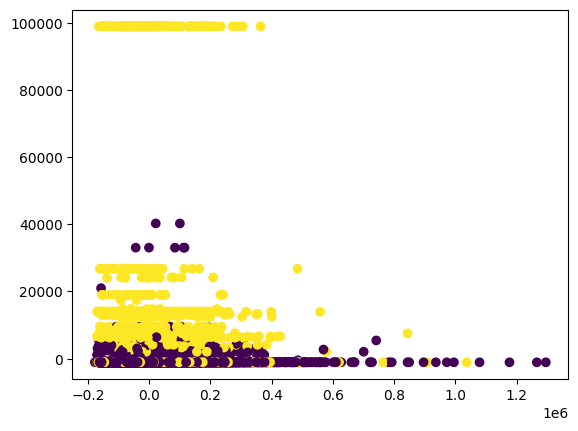

In [13]:
plt.scatter(x_pca_clf[:,0], x_pca_clf[:,1], c=y_clf)

### TSNE

In [15]:
tsne=TSNE(n_components=2)
x_tsne_clf=tsne.fit_transform(ds_clf_bin_enc)
X_train_c2D2, X_test_c2D2, y_train_c2D2, y_test_c2D2 = train_test_split(x_tsne_clf, y_clf, test_size=0.33, random_state=42)

/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/aruzhankaharmanova/Library/Python/3.9/lib/python/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


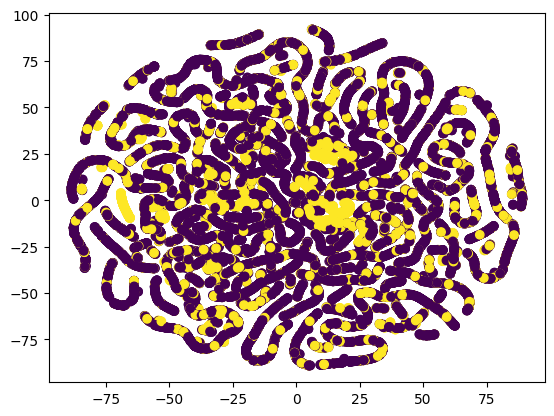

In [16]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], c=y_clf)

# Clustering

In [17]:
from sklearn.cluster import KMeans, AgglomerativeClustering

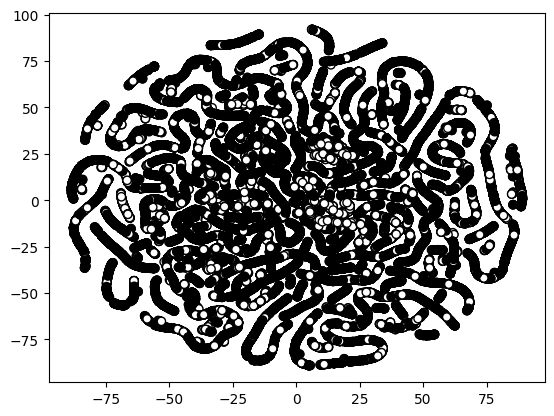

In [18]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=y_clf, cmap='gray')

## K-means

In [19]:
clst=KMeans(n_clusters=5).fit(x_tsne_clf)

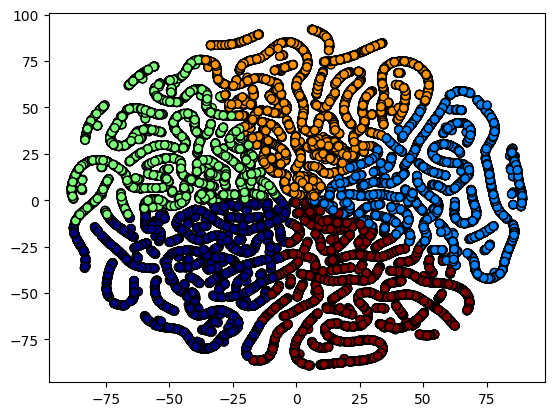

In [20]:
plt.scatter(x_tsne_clf[:,0], x_tsne_clf[:,1], edgecolor='black', c=clst.labels_, cmap='jet')

In [21]:
clst.labels_

array([0, 0, 0, ..., 4, 3, 2], dtype=int32)

In [24]:
clst.cluster_centers_

array([[-37.94979 , -34.761658],
       [ 54.64749 ,   6.936448],
       [-49.315792,  25.060577],
       [  6.72725 ,  49.532967],
       [ 21.323977, -46.994736]], dtype=float32)

In [26]:
daryn=np.array([[ 23.003283 ,  45.699173 ],
       [ 52.395187 ,  -7.5174   ],
       [-44.995434 , -20.133066 ],
       [-38.62873  ,  41.010876 ],
       [  7.7604003, -53.436024 ]])

daniyar=np.array([[-27.395172 , -43.460205 ],
       [ -1.3509645,  54.745056 ],
       [ 46.7869   ,  15.957848 ],
       [-50.77197  ,  14.290402 ],
       [ 34.526375 , -43.987835 ]])

azhar=np.array([[ 27.797762 ,  45.99722  ],
       [  3.0415657, -53.12648  ],
       [-50.01948  , -18.833288 ],
       [-32.272396 ,  39.364723 ],
       [ 50.3723   , -12.114204 ]])

asem=np.array([[-39.709908, -33.705173],
       [ 54.19239 ,   6.198991],
       [-46.485382,  28.100378],
       [ 20.27243 , -47.374187],
       [ 10.277529,  49.675636]])

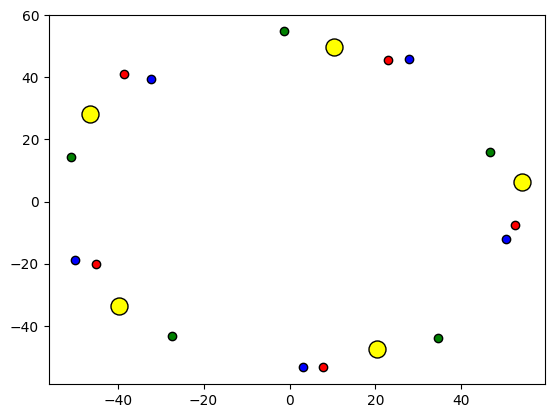

In [27]:
plt.scatter(daryn[:,0], daryn[:,1], edgecolor='black',  color='red')
plt.scatter(daniyar[:,0], daniyar[:,1], edgecolor='black', color='green')
plt.scatter(azhar[:,0], azhar[:,1], edgecolor='black', color='blue')
plt.scatter(asem[:,0], asem[:,1], edgecolor='black', color='yellow', s=150)

In [28]:
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.metrics import pairwise_distances

In [29]:
mx1=pairwise_distances(daryn, asem)

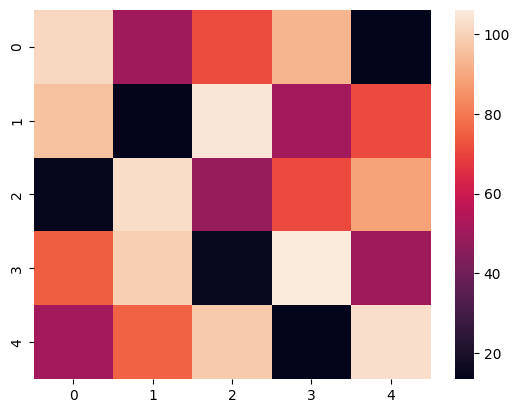

In [30]:
import seaborn as sns; #sns.set_theme()
ax = sns.heatmap(mx1)

In [31]:
mx1

array([[101.18297529,  50.32916424,  71.68257912,  93.11341418,
         13.33255688],
       [ 95.75566813,  13.83363006, 105.09991929,  51.19018448,
         71.02774445],
       [ 14.56498793, 102.6235921 ,  48.25645102,  70.72462615,
         89.0413124 ],
       [ 74.72387118,  99.13439189,  15.11317105, 106.2133043 ,
         49.66789944],
       [ 51.40755442,  75.57952554,  97.93257756,  13.90312033,
        103.14237909]])

In [32]:
mx2=pairwise_distances(daryn, azhar)

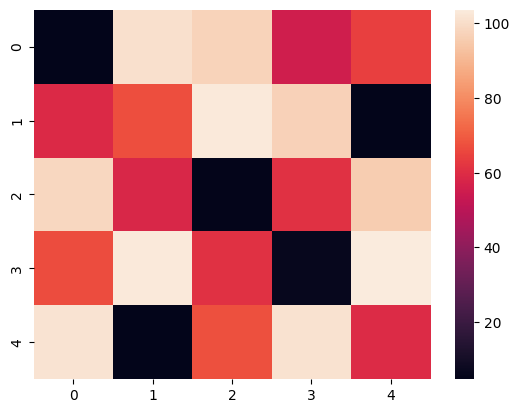

In [33]:
ax2 = sns.heatmap(mx2)

## Agglomerative

In [34]:
clst2=AgglomerativeClustering(n_clusters=5).fit(x_tsne_clf[:,:])#, distance_threshold=100 

In [35]:
print(clst2.n_clusters)

5


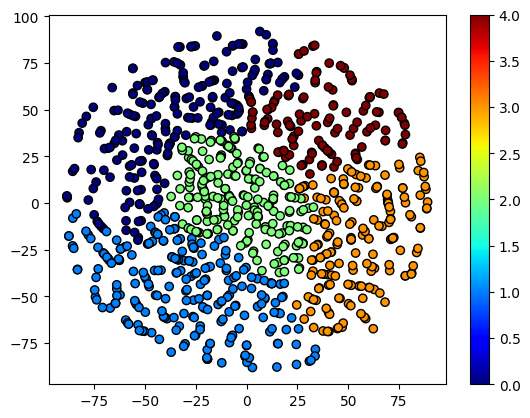

In [40]:
plt.scatter(x_tsne_clf[:1000,0], x_tsne_clf[:1000,1], edgecolor='black', c=clst2.labels_[:1000], cmap='jet')
plt.colorbar()

In [47]:
set(clst2.labels_)

{0, 1, 2, 3, 4}

In [48]:
clst.labels_.shape

(32561,)

/var/folders/6r/1m4vqq2918dbj4br6r6qsn2c0000gn/T/ipykernel_27408/3081347572.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clst.labels_[:1000], clst2.labels_[:1000], edgecolor='black',  cmap='jet')


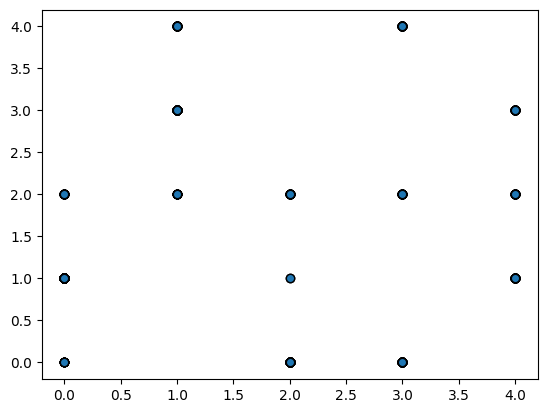

In [49]:
plt.scatter(clst.labels_[:1000], clst2.labels_[:1000], edgecolor='black',  cmap='jet')

In [56]:
df_clust=ds_clf_bin_enc.iloc[:1000,:]#.copy()
df_clust['clust']=clst2.labels_[:1000]
df_clust['target']=y_clf[:1000]
df_clust.groupby(['clust','target']).mean().T

/var/folders/6r/1m4vqq2918dbj4br6r6qsn2c0000gn/T/ipykernel_27408/2046913908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['clust']=clst2.labels_[:1000]
/var/folders/6r/1m4vqq2918dbj4br6r6qsn2c0000gn/T/ipykernel_27408/2046913908.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['target']=y_clf[:1000]


clust                         0                             1             \
target                        0              1              0          1   
age                   35.216216      43.869565      36.658163      44.52   
workclass_0            0.000000       0.000000       0.000000       0.00   
workclass_1            0.183784       0.195652       0.173469       0.26   
workclass_2            0.864865       0.869565       0.897959       0.80   
workclass_3            0.854054       0.869565       0.801020       0.76   
fnlwgt            226368.000000  203593.195652  186811.948980  215614.18   
education_0            0.005405       0.000000       0.010204       0.02   
education_1            0.118919       0.108696       0.127551       0.26   
education_2            0.410811       0.413043       0.428571       0.22   
education_3            0.724324       0.456522       0.698980       0.62   
education_4            0.270270       0.369565       0.280612       0.32   
education-num          9.572973      11.543478       9.454082      11.62   
marital-status_0       0.113514       0.043478       0.096939       0.02   
marital-status_1       0.464865       0.891304       0.551020       0.96   
marital-status_2       0.691892       0.260870       0.612245       0.18   
occupation_0           0.254054       0.217391       0.331633       0.20   
occupation_1           0.610811       0.543478       0.566327       0.56   
occupation_2           0.464865       0.500000       0.464286       0.50   
occupation_3           0.502703       0.282609       0.535714       0.30   
relationship_0         0.389189       0.086957       0.316327       0.10   
relationship_1         0.324324       0.739130       0.377551       0.82   
relationship_2         0.508108       0.369565       0.479592       0.22   
race_0                 0.016216       0.000000       0.010204       0.00   
race_1                 0.178378       0.086957       0.153061       0.16   
race_2                 0.816216       0.956522       0.857143       0.94   
sex_0                  0.351351       0.217391       0.367347       0.16   
sex_1                  0.648649       0.782609       0.632653       0.84   
capital-gain         110.978378     825.695652     214.357143    1104.92   
capital-loss         104.335135     173.543478      30.765306     153.36   
hours-per-week        38.740541      44.086957      36.591837      46.06   
native-country_0       0.000000       0.000000       0.000000       0.00   
native-country_1       0.021622       0.021739       0.025510       0.04   
native-country_2       0.032432       0.021739       0.025510       0.04   
native-country_3       0.054054       0.043478       0.076531       0.04   
native-country_4       0.037838       0.043478       0.040816       0.06   
native-country_5       0.951351       0.978261       0.933673       0.96   

clust                         2                             3                 \
target                        0              1              0              1   
age                   36.398601      42.200000      37.162162      45.342105   
workclass_0            0.000000       0.000000       0.000000       0.000000   
workclass_1            0.181818       0.171429       0.195946       0.184211   
workclass_2            0.839161       0.857143       0.905405       0.789474   
workclass_3            0.853147       0.885714       0.804054       0.842105   
fnlwgt            185419.370629  178387.142857  178833.736486  172804.473684   
education_0            0.000000       0.014286       0.006757       0.000000   
education_1            0.111888       0.128571       0.121622       0.157895   
education_2            0.426573       0.314286       0.337838       0.342105   
education_3            0.699301       0.457143       0.702703       0.552632   
education_4            0.293706       0.457143       0.283784       0.368421   
education-num          9.783217      11.685714       9.459459      11.3

## Dendrogram

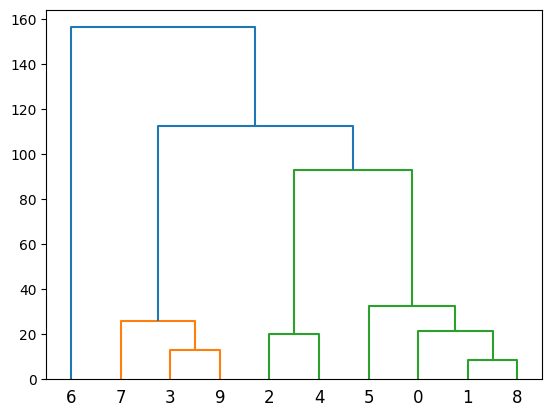

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = x_tsne_clf[:10,0]#[4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = x_tsne_clf[:10,1]#[21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

# Classification with clustering features

## With clustering features

In [52]:
ds_clst=ds_clf_bin_enc.copy()
ds_clst['clst']=clst2.labels_
be=ce.BinaryEncoder(cols=['clst'])
ds_clst=be.fit_transform(ds_clst)
ds_clst.head()

,age,workclass_0,workclass_1,workclass_2,workclass_3,fnlwgt,education_0,education_1,education_2,education_3,...,hours-per-week,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5,clst_0,clst_1,clst_2
0,39,0,0,0,1,77516,0,0,0,0,...,40,0,0,0,0,0,1,0,0,1
1,50,0,0,1,0,83311,0,0,0,0,...,13,0,0,0,0,0,1,0,0,1
2,38,0,0,1,1,215646,0,0,0,1,...,40,0,0,0,0,0,1,0,0,1
3,53,0,0,1,1,234721,0,0,0,1,...,40,0,0,0,0,0,1,0,1,0
4,28,0,0,1,1,338409,0,0,0,0,...,40,0,0,0,0,1,0,0,0,1


In [53]:
xtr,xtst,ytr,yts=train_test_split(ds_clst, y_clf)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
clf=DecisionTreeClassifier()
clf.fit(xtr,ytr)
clf.score(xtst,yts)

0.8145191008475617

## No clustering features

In [55]:
clf=DecisionTreeClassifier()
clf.fit(X_train_c,y_train_c)
clf.score(X_test_c,y_test_c)

0.8042062162665178

# Saving objects to file